In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

Project is about predicting insurance charges using independent variable (age, sex, bmi, number of children, smoking, region)

### Data description

 - Age is a real number
 - Sex binary varibale male and female
 - bmi (body mass index) is a real number
 - children is number of children a person has
 - smoker is a binary variable
 - region is class variable
 - charges is dependent varibale (y)


In [2]:
df = pd.read_csv("data/insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

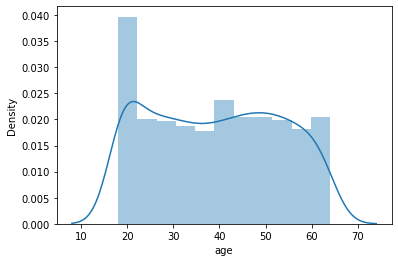

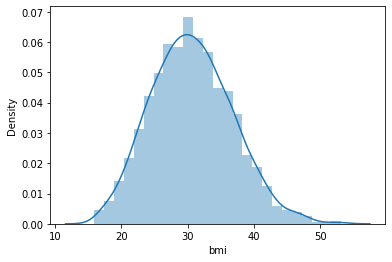

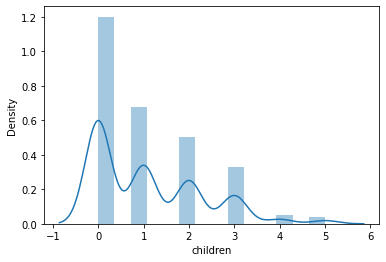

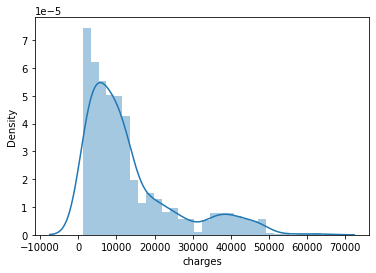

In [7]:
cols = df.columns
for i in cols:
    if df[i].dtypes!='O':
        sns.distplot(df[i])
        plt.show()

### How many people smoke?

Text(0.5, 1.0, 'How many people smoke?')

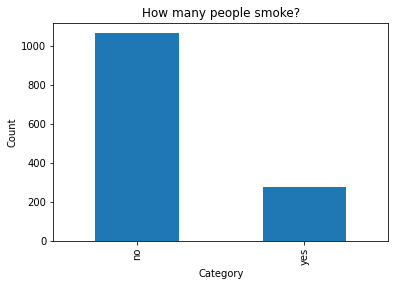

In [27]:
df["smoker"].value_counts().plot.bar()
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("How many people smoke?")

## Bivariant Analysis

### Affect of age on insurance charges?

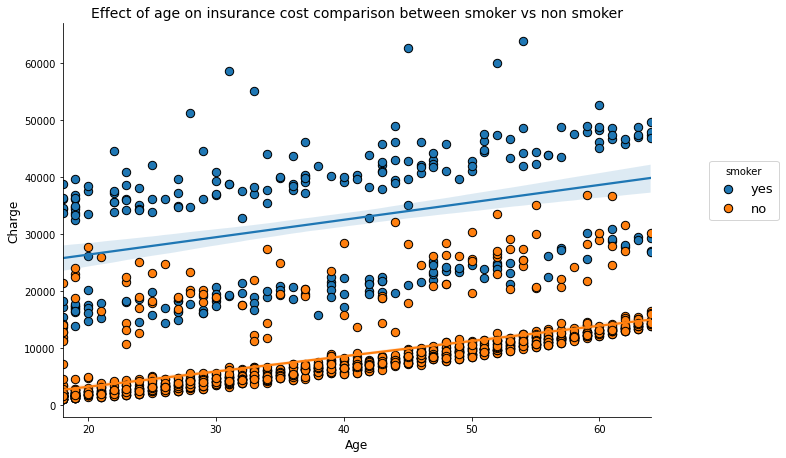

In [39]:
sns.lmplot(x = 'age',y='charges',hue='smoker',data=df,size=6,aspect=1.5,
           scatter_kws={"s": 70, "alpha": 1,'edgecolor':'black'},legend=False,fit_reg=True)

plt.title('Effect of age on insurance cost comparison between smoker vs non smoker',fontsize=14)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Charge',fontsize=12)
plt.legend(loc=[1.1,0.5],title = 'smoker', fontsize=13)

 - Generally age and charges (for smoker and non smoker) have positive correlation, it means as the age is increasing insurance charges is also increasing. 

### Who pays more insurance male or female?

Text(0.5, 1.0, 'Insurance cost ccomparison between male and female')

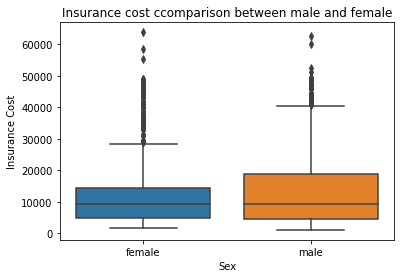

In [33]:
sns.boxplot(x="sex", y="charges", data=df)
plt.xlabel("Sex")
plt.ylabel("Insurance Cost")
plt.title("Insurance cost ccomparison between male and female")

<Figure size 936x360 with 0 Axes>

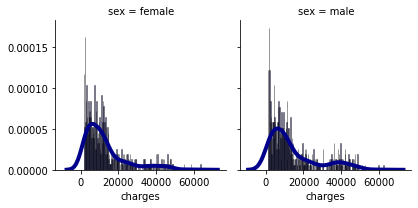

In [11]:
plt.figure(figsize =(13, 5))
g = sns.FacetGrid(df, col='sex', margin_titles=True)
g.map(sns.distplot, 
      'charges',
      bins=int(df.shape[0]/5),
      color='darkblue', 
      hist_kws={'edgecolor': 'black'},
      kde_kws={'linewidth': 4});

For male insurance cost is more right skewed than female,  which means male is has to pay more insurance cost than female, with both male and female containing outliers (Sex alone cannot be factor to predict cost of the insurance).

### Effect of smoking on insurance cost

Text(0.5, 1.0, 'Distribution of insurance cost of smoker and non smoker')

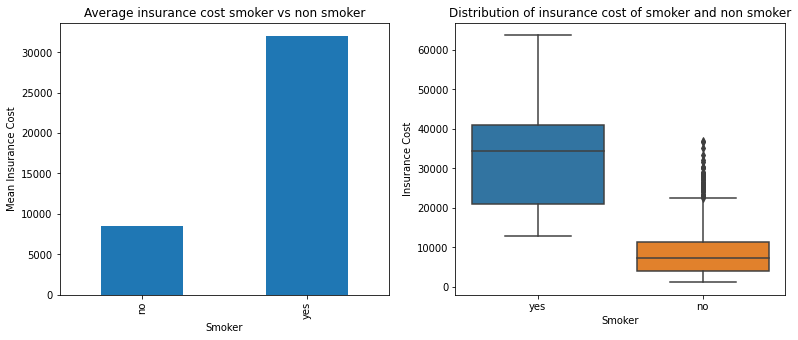

In [40]:
plt.figure(figsize =(13, 5))
plt.subplot(1, 2, 1)
df.groupby(by =["smoker"]).mean()["charges"].plot.bar()
plt.xlabel("Smoker")
plt.ylabel("Mean Insurance Cost")
plt.title("Average insurance cost smoker vs non smoker")
plt.subplot(1, 2, 2)
sns.boxplot(x="smoker", y="charges", data=df)
plt.xlabel("Smoker")
plt.ylabel("Insurance Cost")
plt.title("Distribution of insurance cost of smoker and non smoker")

 - First graph shows the average cost of non-smokers (around 9000) is very less than the smoker (more than 30000).
 - Second graph shows the overall distribution of insurance charges of smoker and non smoker. With some outliers in the nonsmoker category.


### Affect of BMI on insurance cost

Text(-8.699999999999996, 0.5, 'Charge')

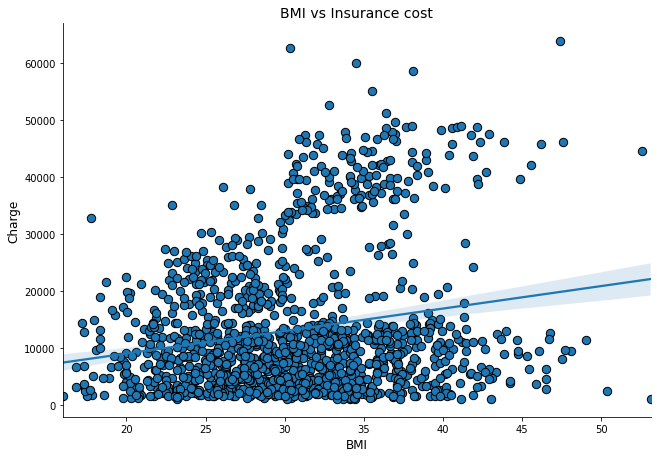

In [13]:
sns.lmplot(x = 'bmi',y='charges',data=df,size=6,aspect=1.5,
           scatter_kws={"s": 70, "alpha": 1,'edgecolor':'black'},legend=False,fit_reg=True)

plt.title('BMI vs Insurance cost',fontsize=14)
plt.xlabel('BMI',fontsize=12)
plt.ylabel('Charge',fontsize=12)

Generally bmi and charges have positive correlation, it means as the bmi is increasing insurance charges is also increasing. However the correlation between bmi and insurance cost is weak.

### Effect of BMI on insurance cost based on smoking habit.

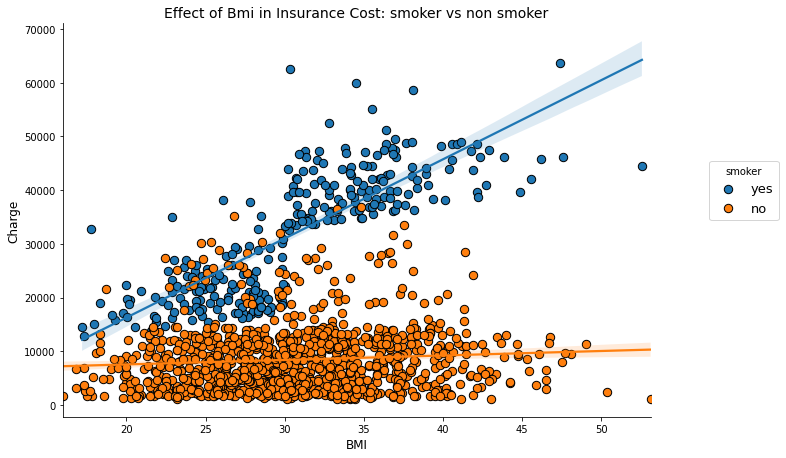

In [35]:
sns.lmplot(x = 'bmi',y='charges',hue='smoker',data=df,size=6,aspect=1.5,
           scatter_kws={"s": 70, "alpha": 1,'edgecolor':'black'},legend=False,fit_reg=True)

plt.title('Effect of Bmi in Insurance Cost: smoker vs non smoker',fontsize=14)
plt.xlabel('BMI',fontsize=12)
plt.ylabel('Charge',fontsize=12)
plt.legend(loc=[1.1,0.5],title = 'smoker', fontsize=13)

 - For non smoker there is almost 0 correleation between BMI and insurance cost, which implies if person doesnot smoke even    though his/her BMI is high, insurance cost will not change.
 - However for smoker there is strong postive correlation between BMI and insurance cost, which implies if person smokes and     his/her BMI is high, insurance cost will also increase.

### Distribution of smokers among the different age group

In [15]:
df['age_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 27), 'age_cat'] = 'Young Adult' # Between 18 to 27 -> young adullt
    col.loc[(col['age'] > 27) & (col['age'] <= 39), 'age_cat'] = 'Adult'        # Between 28 to 39 -> Adullt
    col.loc[(col['age'] > 39) & (col['age'] <= 51), 'age_cat'] = 'Senior Adult' # Between 40 to 51 -> Senior adullt
    col.loc[col['age'] > 51, 'age_cat'] = 'Elder'                               # Above 51         -> Elder

In [16]:
cont_table = pd.crosstab(df["smoker"], df["age_cat"])
print(cont_table)

age_cat  Adult  Elder  Senior Adult  Young Adult
smoker                                          
no         245    269           265          285
yes         67     58            72           77


### Distribution of smokers among male and female

In [17]:
cont_table = pd.crosstab(df["smoker"], df["sex"])
print(cont_table)

sex     female  male
smoker              
no         547   517
yes        115   159


[BMI category](https://www.calculator.net/bmi-calculator.html)

### Distribution of smokers among the different BMI 

In [18]:
df['bmi_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['bmi'] < 16, 'bmi_cat'] = 'Severe T'                            # bmi less than 16            -> Sever Thin
    col.loc[(col['bmi'] >= 16) & (col['bmi'] <= 17), 'bmi_cat']  = 'Moderate T' # bmi between 16 to 17        -> Modertae Thin
    col.loc[(col['bmi'] > 17) & (col['bmi'] <= 18.5), 'bmi_cat'] = 'Mild T'     # bmi greater than 17 to 18.5 -> Mild Thin
    col.loc[(col['bmi'] > 18.5) & (col['bmi'] <= 25), 'bmi_cat'] = 'N'          # bmi greater than 18.5 to 25 -> Normal
    col.loc[(col['bmi'] > 25) & (col['bmi'] <= 30), 'bmi_cat']   = 'O.W.'       # bmi greater than 25 and equall to 30 -> Over weight
    col.loc[(col['bmi'] > 30) & (col['bmi'] <= 35), 'bmi_cat']   = 'ObeseI'     # bmi greater than 30 and equal to 25 -> Obese cat 1
    col.loc[(col['bmi'] > 35) & (col['bmi'] <= 40), 'bmi_cat']   = 'ObeseII'    # bmi greater than 18.5 and equal to 25 -> Obese cat 2
    col.loc[col['bmi'] > 40, 'bmi_cat'] = 'ObeseIII'                            # bmi greater than 18.5 and equal to 25 -> Obese cat 3

Text(0.5, 1.0, 'Frequency of people in different BMI category')

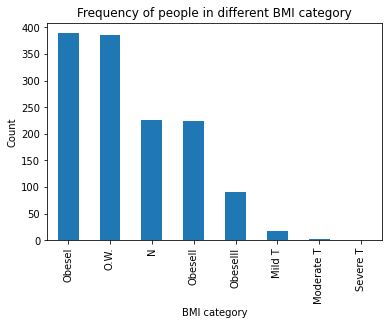

In [36]:
cat_bmi = df.bmi_cat.value_counts()
cat_bmi.plot.bar()
plt.xlabel("BMI category")
plt.ylabel("Count")
plt.title("Frequency of people in different BMI category")

In [20]:
cont_table = pd.crosstab(df["smoker"], df["bmi_cat"])
print(cont_table)

bmi_cat  Mild T  Moderate T    N  O.W.  ObeseI  ObeseII  ObeseIII  Severe T
smoker                                                                     
no           13           2  176   311     316      175        70         1
yes           5           0   50    75      73       50        21         0


### Obesity vs Insurance cost

Text(0.5, 1.0, 'Distribution of insurance cost in different BMI categories smoker and non smoker')

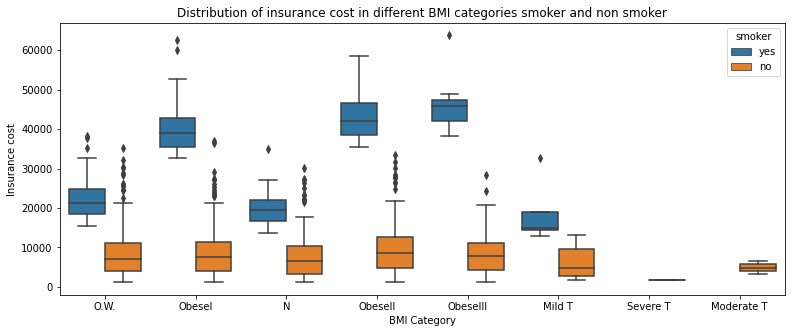

In [38]:
plt.figure(figsize =(13, 5))
sns.boxplot(x="bmi_cat", y="charges", data=df, hue= "smoker")
plt.xlabel("BMI Category")
plt.ylabel("Insurance cost")
plt.title("Distribution of insurance cost in different BMI categories smoker and non smoker")

 - In general, smoker pays more for than non smoker people, along all categories of BMI, However people from `O.W.` (Overweight), `N` (Normal), `Mild T.` (Mild thin) category of BMI pays less even if they smoke than other categories who smoke.

- In general, smoker pays more for than non smoker people, along all categories of BMI, However people from `O.W.`(Over weight), `N` (Normal), `Mild T.` (Mild thin) category of BMI pays less even they smoke than other category who smoke.

In [22]:
cols = ["smoker", "age", "bmi"]
X =  df[cols]
X = pd.get_dummies(X, drop_first= True)
X = sm.add_constant(X)
y = df["charges"]

In [23]:
olsmod = sm.OLS(y, X)
model_ful = olsmod.fit()

In [24]:
print(model_ful.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Sat, 03 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:17:55   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.168e+04    937.569    -12.454      0.0

# Interpreting the model:

### Understanding the model.
Let’s consider we have simple linear regression with one independent variable (X1) and one dependent variable (y). R_square is one way to check model performance. R_square shows the variability in (y) explained by (X1). In simple words if R_square is 0.85 so with X1 85% of variation is explained in (y). 
### Problem with R square 
•	Now let’s say we add one more independent variable (X2), R2 will increase even though there is no relationship between independent variable (X2) and dependent variable (y) to solve this problem there is something called Adjusted R_square.
### Adjusted R Square
•	Adjusted R square does not increase with addition of insignificant variable, rather it decreases (it penalises addition of insignificant variable). Adjusted R_square only increases when a significant variable is added. Hence Adjusted R_square is more reliable then R_square for multiple linear regression.
### Our model
- Our model has both R_square and adjusted R_square = 0.74, which means with 3 variables we can explain 74% variability.

### Coefficient:
Equation of regression with p feature is given as:


    y = b0 + b1X1 + b2X2 + b2X3 + .... + bpXp
    
For simplicity let's consider y is only dependent on X1.
    
                
    y = b0 + b1X1

#### Interpretation:
With every unit increase in X1, y will increase b1 time.

- What if there are multiple coefficients?

        y = b0 + b1X1 + b2X2 + b2X3 

#### Interpretation: 
With every unit increase in X1, y will increase b1 time with X2, X3 held constant.

#### Our model Interpretation:
We are predicting insurance costs with age, bmi and smoking habits.

        insurance  = - 11680 + 259.54 * age + 322.61 * bmi + 23820 * smoker_yes
        
With every unit increase in age, insurance will increase 259.54 times with bmi, smoker_yes held constant.      

With every unit increase in bmi, insurance will increase 322.61 times with age, smoker_yes held constant.

With every unit increase in smoker_yes, insurance will increase 23820 times with age, bmi held constant.

#### Dealing with Categorical variable:
Machine learning models do not understand categorical variables, In order to use those variables in our ML model we have to convert them into numbers and one of the ways to convert categories into numbers is `one hot encoding` which creates columns containing binary values {0,1}.
 - In our model: 
 
            insurance  = - 11680 + 259.54 * age + 322.61 * bmi + 23820 * smoker_yes
            
   Smoker variable is a binary, if a person smokes it has value 1 and if the person doesn't smoke the value is 0.
   

    If person smokes regression equation:
    
           insurance  = - 11680 + 259.54 * age + 322.61 * bmi + 23820 * smoker_yes
     
     If person doesnot smoke regression equation:
     
             insurance  = - 11680 + 259.54 * age + 322.61 * bmi 
     
     Coefficient of smoke variable is positive (23820) which means they have to pay 23820 more than the who doesnot smoke.

### P value:
Let's say we are building a regression model which is dependent on just variable (y~X1) y is dependent on X1. At the start it is believed that there is no relationship between X1 and y, which means the best prediction of y is y_mean.

Arithmetically,

                                   y = b0 + b1.X1 (b1=0 believed H0)
                                    y = b0 or y = y_mean
                                    
`Ho`: b1 = 0 (y is not dependent on X1)
`H1`: b1!=0  (y is dependent on X1)

`In simple words, p value is the measure of probability of b1=0.`

 - If p value is greater than or equal to 0.05 which means there is atleast 5% chance of b1=0, hence the variable is less significant. Vice Versa If p value is less than 0.05 the chance of b1=0 is less than 5%. This is calculated by constructing a 95% Confidence interval of b1.
 
In our model

      Variable          P Value          
        age              0.000
        bmi              0.000
        smoker_yes       0.000
for all the variable p value<0.05 which means our features are significant.


In [351]:
y_pred = model_ful.predict(X)
error = y - y_pred

<AxesSubplot:>

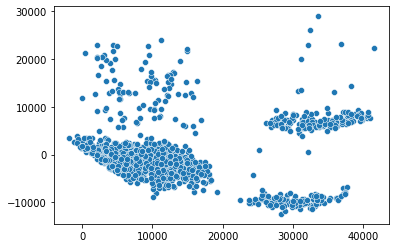

In [352]:
sns.scatterplot(y_pred, error)

<AxesSubplot:ylabel='Density'>

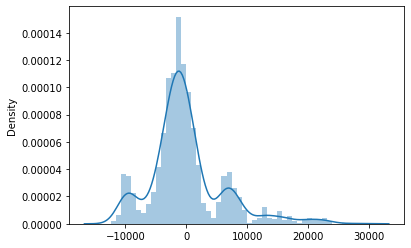

In [353]:
sns.distplot(error)